In [13]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

In [37]:
omega0 = 1.0
delta = 0.3
hbar = 1.0
Omega0 = 1.0
H0 = hbar*delta*(qt.sigmaz()+qt.qeye(2))
H1 = hbar/2*Omega0*qt.sigmax()
H = H0 + H1

In [38]:
psi0 = qt.basis(2,0)
ts = np.linspace(0,6.0*np.pi,100)
result = qt.mesolve(H, psi0, ts,[],[0.5*(qt.qeye(2)+qt.sigmaz())])

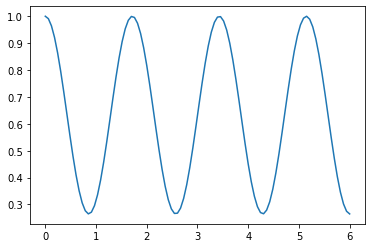

In [39]:
plt.plot(ts/np.pi, result.expect[0])

In [42]:
qt.sigmax() * qt.sigmax().dag

TypeError: unsupported operand type(s) for *: 'Qobj' and 'method'

In [41]:
qt.sigmax().dag

<bound method Qobj.dag of Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]>

In [44]:
qt.destroy(2)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

In [92]:
Omega12 = 1.0
Omega23 = 1.0
delta12 = 0.5
delta23 = 0.0
H = hbar/2*qt.Qobj([[0      ,    Omega12,       0], \
                    [Omega12, -2*delta12, Omega23], \
                    [0      ,    Omega23, -2*(delta12+delta23)]])
c1=qt.Qobj([[1,0,0],[0,0,0],[0,0,0]])
c2=qt.Qobj([[0,0,0],[0,1,0],[0,0,0]])
c3=qt.Qobj([[0,0,0],[0,0,0],[0,0,1]])

In [93]:
psi0 = qt.basis(3,1) #start in state 1

In [94]:
result = qt.mesolve(H, psi0, ts,[],[c1,c2,c3])

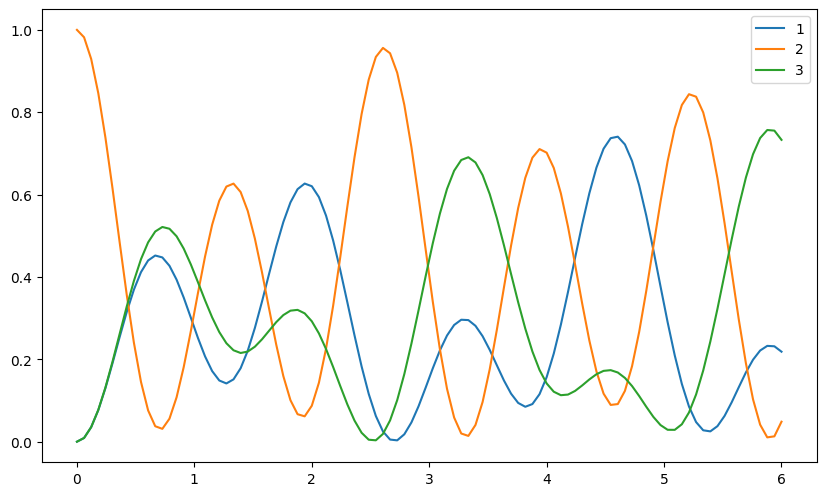

In [95]:
plt.figure(figsize=(10,6), dpi=100)

plt.plot(ts/np.pi, result.expect[0], label="1")
plt.plot(ts/np.pi, result.expect[1], label="2")
plt.plot(ts/np.pi, result.expect[2], label="3")
#plt.plot(ts/np.pi, result.expect[0]+result.expect[1]+result.expect[2], label="Total")
plt.legend()
plt.show()